# Подготовка (pandas, numpy, etc)

## numpy

In [2]:
# Установка необходимых библиотек через pip.
!pip install numpy  # Устанавливает библиотеку numpy для работы с массивами и числовыми операциями.
!pip install pandas  # Устанавливает библиотеку pandas для работы с таблицами и анализом данных.
!pip install matplotlib  # Устанавливает библиотеку matplotlib для построения графиков.
!pip install seaborn  # Устанавливает библиотеку seaborn для визуализации данных.
!pip install scikit-learn  # Устанавливает библиотеку scikit-learn для машинного обучения.

# Импортирование установленных библиотек для дальнейшего использования.
import numpy as np  # Импорт numpy для работы с массивами.
import pandas as pd  # Импорт pandas для обработки данных.
import matplotlib.pyplot as plt  # Импорт модуля pyplot из matplotlib для построения графиков.
import seaborn as sns  # Импорт seaborn для улучшенной визуализации.
from sklearn.linear_model import LinearRegression  # Импорт модели линейной регрессии из scikit-learn.
from sklearn.model_selection import train_test_split  # Импорт функции для разделения данных на тренировочные и тестовые.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Метрики для оценки моделей.

# Пример использования numpy для создания массивов данных.
y_pred = np.array([0.9, 0.2, 0.1, 0.4, 0.9])  # Предсказанные значения модели.
y_ans = np.array([1, 0, 0, 1, 1])  # Истинные значения для оценки точности.


### 1. $L_1$ норма
Напишите функцию, которая для двух векторов вычисляет их $L_1$ норму ("манхэттенское расстояние" или "расстояние городских кварталов"):
$$\begin{align*} & L_1(y_{pred}, y) = \sum_{i=0}^m|y^{(i)} - y_{pred}^{(i)}| \end{align*}$$  

In [3]:
def L1_norm(y_pred, y_ans):
    y_pred = np.array(y_pred)  # Создание массива предсказанных значений.
    y_ans = np.array(y_ans)  # Создание массива истинных значений для сравнения.
    return np.sum(np.abs(y_ans - y_pred))

assert round(L1_norm(y_pred, y_ans), 1) == 1.1, 'Неверно реализован расчёт'

In [4]:
print(f"L1 = {L1_norm(y_pred, y_ans)}")

L1 = 1.1


### 2. $L_2$ норма
Напишите функцию, которая для двух векторов вычисляет их $L_2$ норму (евклидово расстояние):
$$\begin{align*} & L_2(y_{pred},y) = \sum_{i=0}^m(y^{(i)} - y_{pred}^{(i)})^2 \end{align*}$$

In [5]:
def L2_norm(y_pred, y_ans):
    y_pred = np.array(y_pred)  # Создание массива предсказанных значений.
    y_ans = np.array(y_ans)  # Создание массива истинных значений для сравнения.
    return np.sum(np.square(y_ans - y_pred))

assert round(L2_norm(y_pred, y_ans), 3) == 0.43, 'Неверно реализован расчёт'

In [6]:
print(f"L2 = {L2_norm(y_pred, y_ans)}") 

L2 = 0.43


### 3. Строки с одинаковыми значениями
Напишите функцию, которая для 2-мерной матрицы произвольного размера возвращает все строки, содержащие только одинаковые значения (напр. [2, 2, 2, 2])

In [7]:
# Установка начального значения для генератора случайных чисел, чтобы результаты были воспроизводимы.
np.random.seed(777)
# Создание случайной 2-мерной матрицы размером 6x5 со значениями от 0 до 4 (включительно).
Z = np.random.randint(0, 5, (6, 5))
# Создание двумерного массива с двумя строками: первая строка состоит из единиц, вторая из нулей.
Z_eq = np.array((np.ones(5), np.zeros(5)))
# Объединение массивов Z и Z_eq по вертикали (добавление строк из Z_eq к массиву Z).
Z = np.vstack((Z, Z_eq))
print(Z)  # Вывод объединенной матрицы.

[[3. 1. 4. 1. 2.]
 [0. 2. 0. 3. 1.]
 [2. 4. 1. 3. 2.]
 [2. 2. 4. 0. 2.]
 [2. 4. 0. 0. 0.]
 [3. 2. 2. 0. 3.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


In [8]:
# Определение функции, которая возвращает строки из матрицы, содержащие только одинаковые значения.
def all_the_same(X):
    # np.all проверяет, выполняется ли условие по всем элементам. 
    # Здесь проверяется, равны ли все элементы строки первому элементу этой строки.
    # np.all(..., axis=1) выполняет проверку для каждой строки.
    return X[np.all(X == X[:, [0]], axis=1)]  # Возвращаются только строки, где все значения одинаковы.


In [9]:
# Вызов функции для массива Z и вывод результата.
print("Строки с одинаковыми значениями:\n", all_the_same(Z))

Строки с одинаковыми значениями:
 [[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


## pandas

__Прочитайте "telecom_churn.csv" в датафрейм__

In [10]:
# Читаем данные из файла "telecom_churn.csv" в DataFrame.
# DataFrame — это двумерная структура данных в pandas, напоминающая таблицу.
df = pd.read_csv('telecom_churn.csv')

__Выведите первые 10 строк__

In [11]:
print(df.head(10))  # Метод head(n) возвращает первые n строк (по умолчанию 5)

   CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   
5     3000030    No           38.05           682.0                  52.0   
6     3000038    No           31.66            26.0                  30.0   
7     3000042    No           62.13            98.0                  66.0   
8     3000046    No           35.30            24.0                  35.0   
9     3000050    No           81.00          1056.0                  75.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0  

__Выведите число объектов и колонок в датафрейме__

In [12]:
# Метод shape возвращает кортеж (число строк, число столбцов).
num_rows, num_columns = df.shape
print(f'Количество объектов (строк): {num_rows}')  # Вывод количества строк.
print(f'Количество колонок: {num_columns}')  # Вывод количества столбцов.

Количество объектов (строк): 51047
Количество колонок: 58


__Выведите названия всех колонок__

In [13]:
# Метод columns возвращает индекс, который можно преобразовать в список методом tolist().
print(df.columns.tolist())

['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam', 'C

__Покажите все возможные значения поля UniqueSubs и их количества__

In [14]:
# Метод value_counts() подсчитывает количество вхождений каждого уникального значения.
unique_subs_counts = df['UniqueSubs'].value_counts()
print(unique_subs_counts)  # Вывод уникальных значений и их количества.

UniqueSubs
1      32109
2      13852
3       3212
4       1219
5        421
6        147
7         49
9         12
8         10
10         6
11         3
12         3
13         2
18         1
196        1
Name: count, dtype: int64


__Сгруппируйте данные по полю MaritalStatus и посчитайте среднее для InboundCalls и OutboundCalls (ответ должен быть в виде таблицы)__

In [15]:
# Метод groupby('колонка') группирует данные по указанной колонке.
# Метод mean() вычисляет среднее значение для числовых столбцов в группах.
# reset_index() преобразует индекс группы в обычный столбец, чтобы результат был таблицей.
result = df.groupby('MaritalStatus')[['InboundCalls', 'OutboundCalls']].mean().reset_index()
print(result)  # Выводим таблицу с результатами.

  MaritalStatus  InboundCalls  OutboundCalls
0            No      8.620920      27.108688
1       Unknown      9.868609      29.655690
2           Yes      6.091089      19.680832


# Сама лаба

__Считайте данные и выведете первые 5 строк датасета (tips.csv)__

In [17]:
df_tips = pd.read_csv('tips.csv')  # Читаем файл 'tips.csv' и загружаем его в DataFrame.
print(df_tips.head())  # Выводим первые 5 строк из DataFrame для первичного анализа данных.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


__Покажите на графике зависимость размера чаевых от времени и разделите это по полам__

Использовать _catplot_

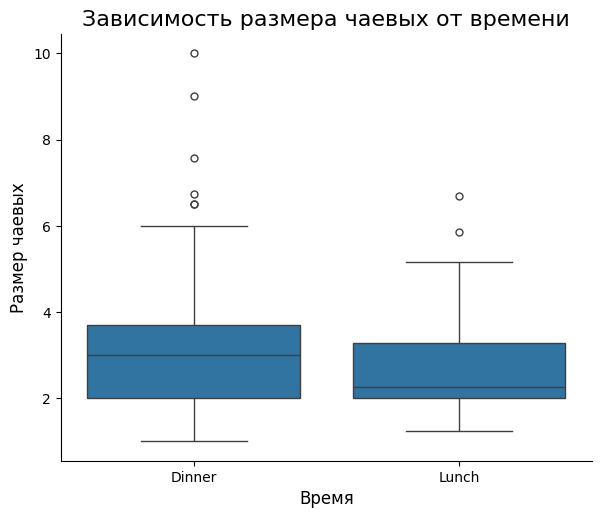

In [18]:
sns.catplot(
    x='time',  # Указываем, что по оси x будут отображаться категории времени ('Lunch', 'Dinner').
    y='tip',  # По оси y будет размер чаевых.
    data=df_tips,  # Передаем DataFrame с данными для анализа.
    kind='box',  # Тип графика — "ящик с усами" (boxplot), показывающий распределение данных.
    height=5,  # Высота графика в дюймах.
    aspect=1.2  # Соотношение ширины к высоте графика.
)
# Устанавливаем заголовок графика и подписи к осям с помощью методов plt.
plt.title('Зависимость размера чаевых от времени', fontsize=16)
plt.xlabel('Время', fontsize=12)
plt.ylabel('Размер чаевых', fontsize=12)
plt.show()  # Отображаем график.

Влияние времени суток: Время суток оказывает влияние на размер чаевых. Клиенты чаще оставляют больше чаевых вечером, что может быть связано с более дорогими блюдами, расслабленной атмосферой или социальными нормами.

Выбросы на ужине: Выбросы на ужине могут свидетельствовать о более крупной трате в отдельных случаях, например, во время празднования или при обслуживании больших групп.

Предпочтения клиентов: Средний размер чаевых на обед более стабильный и меньше, что может быть связано с ограничениями в бюджете в дневное время.

__Покажите на графике зависимость размера чаевых от полного счета и разделите это по полам__

Использовать _lineplot_

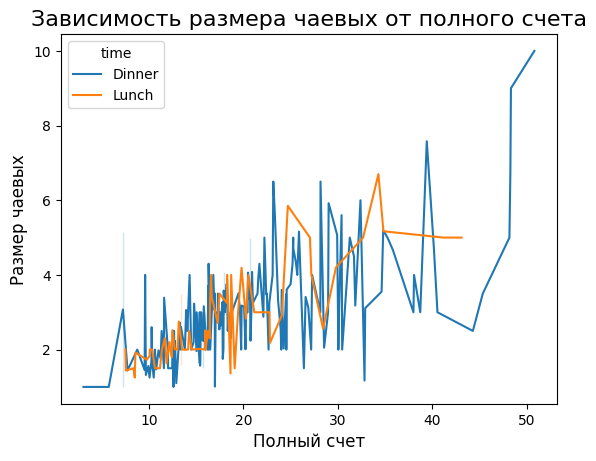

In [19]:
sns.lineplot(
    data=df_tips,  # DataFrame для анализа.
    x='total_bill',  # По оси x — значения полного счета.
    y='tip',  # По оси y — размер чаевых.
    hue='time',  # Разделение данных на категории времени ('Lunch' и 'Dinner').
    estimator='mean'  # Для каждой точки графика вычисляем среднее значение.
)
# Устанавливаем заголовок графика и подписи к осям.
plt.title('Зависимость размера чаевых от полного счета', fontsize=16)
plt.xlabel('Полный счет', fontsize=12)
plt.ylabel('Размер чаевых', fontsize=12)
plt.show()  # Отображаем график.

Влияние размера счета: Увеличение суммы счета ведет к увеличению размера чаевых, особенно заметно это на ужине.

Различия между обедом и ужином:
Клиенты ужина чаще оставляют более крупные чаевые, особенно при высоких суммах счета.
Для обеда чаевые имеют меньшую вариативность и реже превышают определенные значения, даже при крупных заказах.

Влияние времени суток:
Вечером клиенты склонны тратить больше, как на еду, так и на чаевые. Это может быть связано с настроением или социальной обстановкой (например, ужин в ресторане воспринимается как событие).

In [20]:
#Просто выполните
# Создаем новый DataFrame X_1, удаляя ненужные столбцы ('tip', 'sex', 'smoker', 'day', 'time').
X_1 = df.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1, errors='ignore')

# Создаем X_2, удаляя другие столбцы ('total_bill', 'size', 'tip').
X_2 = df.drop(['total_bill', 'size', 'tip'], axis=1, errors='ignore')

# Выделяем целевую переменную y как массив, удаляя лишние столбцы из DataFrame.
y = np.array(
    df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1, errors='ignore').values
)

# Преобразуем категориальные данные в X_2 с помощью метода pd.get_dummies().
X_2_clear = pd.get_dummies(X_2)

# Объединяем X_1 и X_2_clear по горизонтали и преобразуем в массив numpy.
X = np.array(pd.concat([X_1, X_2_clear], axis=1).values)
print(X)  # Выводим итоговую матрицу X.


[[3000002 'Yes' 24.0 ... True False False]
 [3000010 'Yes' 16.99 ... False False True]
 [3000014 'No' 38.0 ... False False True]
 ...
 [3399978 'Yes' nan ... True False False]
 [3399990 'No' nan ... True False False]
 [3399994 'No' nan ... False True False]]


In [21]:
#Просто выполните
# Объединяем X_1 и X_2_clear в одну таблицу features.
features = pd.concat([X_1, X_2_clear], axis=1)

# Целевой признак target создается путем удаления ненужных столбцов.
target = df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1, errors='ignore')

# Разделяем данные на тренировочные и тестовые наборы.
train_data, test_data, train_target, test_target = train_test_split(
    features, target, test_size=0.3, random_state=0
)
# Выводим размеры тренировочных и тестовых данных.
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Train target shape: {train_target.shape}')
print(f'Test target shape: {test_target.shape}')


Train data shape: (35732, 912)
Test data shape: (15315, 912)
Train target shape: (35732, 58)
Test target shape: (15315, 58)


<font size=3 >__Немного теории__</font>

Мы разберем __основные метрики качества и функционалы потерь__ задачи регрессии. Далее все будем называть __метриками__.

__Метрики необходимы для:__
- поиска оптимального решения
- оценки качества работы модели
- сравнения моделей
- интерпретации результатов



<table border="1" width="100%">
 <tr>
    <td width="50%"> 
        <p> <font size=3> $MAE= \frac{1}{n} \sum_{i=1}^n |y_i-\hat{y_i}|$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                легко интерпретировать 
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                единицы измерения таргета и метрики – эквивалентны
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                устойчива к выбросам 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не дифференцируема в таком виде 
            </font>
        </p><br/>
        <p> <font size=3> $MSE= \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                дифференцируема
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                чувствительна к выбросам
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                сложно интерпретировать 
            </font><br/>
        </p><br/>
        <p> <font size=3> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2} $  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                дифференцируема
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                еще сложнее интерпретировать 
            </font>
        <p>Основное различие $RMSE$ и $MAE$ заключается в том, что минимизация $RMSE$ сремиться к средней оценке, а  $MAE$ к медиане</p><br/><p>$y$ $-$ истинное значение; $\hat{y}$ $-$ предсказанное значение</p>
        </p><br/>
     </td>
    <td><img src="./errors_2.png" align="right"></td>
 </tr>
</table>

Две попытки __объединить__ положительные __свойства метрик__:
- [Функция потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss): 
    * ведет себя как $MSE$ на ошибках меньше $\sigma$ и как $MAE$ в противном случае. __Что не дает "взрываться" метрике на больших значениях и "жестко" реагирует на маленькие остатки__
    * все так же не удобно дифференцировать
- [Log-Cosh Loss](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0):
    * принимает меньшие значения по сравнению с функцией потерь Хьюбера на всем множестве
    * __дважды дифференцируема__, что необходимо в некоторых методах численной оптимизации.
________________________
__Проблема:__ все предыдущие метрики __не подходят для оценки конкретного решения__ а только для сравнения моделей, что следует из того что __функции не ограничены сверху.__ 

Эта проблема так же решается посредством доработок $MAE$: [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) и [SMAPE](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error). Однако, подробно рассмотрим метрику $R^2$
и мотивы появления $R^2_{adj}$.

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y_i})^2}$$

Данная метрика обладает следующими свойствами:

<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     ограничена сверху и снизу, что позволяет дать оценку конкретному решению без сравнения с другими
</font><br/>
<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     хорошо интерпретируется: на сколько наша модель лучше, чем константное решение
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     не диффиренцируема
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     значение метрики растет (не уменьшается) при добавлении новых переменных, даже если они никак не объясняют целевой показатель. Поэтому нельзя сравнивать модели с разным количеством признаков. Данная проблема решается с помощью $R^2_{adj}$
</font>

$$R^2_{adj}=1-(1-R^2)\frac{n-1}{n-p-1}$$

где $p -$ число признаков, а $n -$ количество объектов

__Рекомендации:__ использовать $R^2_{adj}$ для сравнения моделей и оценки количества переменных, а $R^2$ для оценки качества на новых объектах


__В данном задании вам необходимо реализовать 4 основные метрики:__ $MAE; MSE; RMSE; R^2$

Каждая из метрик принимает на вход 2 одномерных numpy массива:
- __y_true__ - истинные значения 
- __y_predict__ - предсказанные значения

Каждая из функций должна возврашать одно число 



In [22]:
# Средняя абсолютная ошибка (MAE).
def MAError(y_true, y_predict):
    error = sum(abs(y_t - y_p) for y_t, y_p in zip(y_true, y_predict)) / len(y_true)
    return error

# Среднеквадратичная ошибка (MSE).
def MSError(y_true, y_predict):
    error = np.mean((y_true - y_pred) ** 2)
    return error

# Корень из среднеквадратичной ошибки (RMSE).
def RMSError(y_true, y_predict):
    error = np.sqrt(sum((y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_predict)) / len(y_true))
    return error

# Коэффициент детерминации (R^2).
def R_square(y_true, y_predict):
    y_mean = y_true.mean()  # Среднее значение целевой переменной.
    total_sum_of_squares = ((y_true - y_mean) ** 2).sum()  # Общая сумма квадратов.
    sum_of_squared_errors = ((y_true - y_predict) ** 2).sum()  # Сумма квадратов ошибок.
    error = 1 - (sum_of_squared_errors / total_sum_of_squares)  # Коэффициент детерминации.
    return error

# Объединяем все метрики в один словарь.
def all_metric(y_true, y_predict):
    d = {}
    d['MAE'] = [MAError(y_true, y_predict)] 
    d['MSE'] = [MSError(y_true, y_predict)] 
    d['RMSE'] = [RMSError(y_true, y_predict)]
    d['R_square'] = [R_square(y_true, y_predict)]
    return d


__Обучим модель и сгенерируем данные для проверки функций ошибок__

In [28]:
from sklearn.linear_model import LogisticRegression  # Импортируем логистическую регрессию
from sklearn.datasets import load_diabetes  # Импортируем набор данных о диабете
from sklearn.preprocessing import StandardScaler  # Для масштабирования данных
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающие и тестовые выборки

In [29]:
# Создаем модель логистической регрессии с увеличением максимального количества итераций
model = LogisticRegression(max_iter=5000)
# Загружаем данные о диабете: признаки и целевая переменная
features, target = load_diabetes(return_X_y=True, as_frame=True)
# Создаем объект для масштабирования данных
scaler = StandardScaler()

In [30]:
# Масштабируем признаки, чтобы сделать их стандартизированными
X = scaler.fit_transform(features)
# Объединяем признаки и целевую переменную для анализа (в один DataFrame)
full = pd.concat([features, target], axis=1)
# Разделяем данные на обучающую и тестовую выборки (объединенные данные)
full_train, full_test = train_test_split(pd.concat([pd.DataFrame(X), pd.Series(target)], axis=1), test_size=0.2, random_state=42, shuffle=True)
# Разделяем данные отдельно на признаки и целевую переменную (обучающие и тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42, shuffle=True)

In [31]:
# Обучаем модель логистической регрессии на обучающих данных
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [32]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

In [33]:
# Импортируем метрики для оценки качества модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Проверяем, что реализация метрики MAE соответствует реализации в sklearn
assert round(MAError(y_true=y_test, y_predict=y_pred), 3) == round(mean_absolute_error(y_test, y_pred), 3), 'Неверно реализован расчёт'
# Проверяем, что реализация метрики MSE соответствует реализации в sklearn
assert round(MSError(y_true=y_test, y_predict=y_pred), 3) == round(mean_squared_error(y_test, y_pred), 3), 'Неверно реализован расчёт'
# Проверяем, что реализация метрики RMSE соответствует корню из MSE в sklearn
assert round(RMSError(y_true=y_test, y_predict=y_pred), 3) == round(np.sqrt(mean_squared_error(y_test, y_pred)), 3), 'Неверно реализован расчёт'
# Проверяем, что реализация коэффициента детерминации R² соответствует реализации в sklearn
assert round(R_square(y_true=y_test, y_predict=y_pred), 3) == round(r2_score(y_test, y_pred), 3), 'Неверно реализован расчёт'

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$


Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

__Реализуйте функции__
1. __normal_equation__, которая по заданным матрицам (массивам NumPy) X* и *y вычисляет вектор весов  𝑤  согласно нормальному уравнению линейной регрессии.

2. __linear_prediction__, которая принимает на вход матрицу X* и вектор весов линейной модели *w, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы X* с весами *w.

In [35]:
# Функция для вычисления весов линейной регрессии методом нормальных уравнений
def normal_equation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавляем столбец единиц для свободного члена
    w = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y  # Вычисляем веса с использованием псевдообратной матрицы
    return w

# Функция для вычисления предсказаний линейной регрессии
def linear_prediction(X, w):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавляем столбец единиц для свободного члена
    predictions = X_b @ w  # Вычисляем предсказания
    return predictions

# Вычисляем веса линейной регрессии методом нормальных уравнений
w = normal_equation(X_train, y_train)
print("Вектор весов w:", w)

# Выполняем предсказания на тестовой выборке
predictions = linear_prediction(X_test, w)
print("Предсказания:", predictions)

Вектор весов w: [151.34560454   1.80291044 -11.50907105  25.80070495  16.53858529
 -44.30640613  24.64170961   7.77309591  13.09553713  35.01740872
   2.31502709]
Предсказания: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.6

In [36]:
# Считаем метрику MSE для тестовой выборки, предсказанной нормальным уравнением
test_data = X_test  # Данные, которые вы использовали для тестирования
test_target = y_test
norm_eq_weights = w
tip_pred = MSError(test_target.to_numpy(), linear_prediction(test_data, norm_eq_weights))
print(tip_pred)

# Проверяем корректность пользовательской реализации метрики MSE
assert round(MSError(test_target.to_numpy(), linear_prediction(test_data, norm_eq_weights)), 3) == 3348.831, 'Не верно реализован расчёт'

3348.8314606741574


In [37]:
# Обучаем линейную регрессию на тренировочных данных и делаем предсказания
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
LinReg = LinearRegression()
LinReg.fit(train_data, train_target)
ans1 = LinReg.predict(test_data)

In [38]:
# Просто выполнить
# Считаем среднеквадратичную ошибку для предсказаний линейной регрессии
mean_squared_error(test_target, ans1)

np.float64(2900.1936284934814)